In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from ID3Custom import CustomID3

dataset = pd.read_csv("Task1.csv")

In [9]:
le_gender = LabelEncoder()
dataset['Gender'] = le_gender.fit_transform(dataset['Gender'])

input_data = pd.DataFrame([[6.50, 190, 9]], columns=['Height', 'Weight', 'Foot_Size'])

X = dataset[['Height', 'Weight', 'Foot_Size']]
y = dataset['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CustomID3()
train_data = pd.concat([X_train, y_train], axis=1).values
model.fit(train_data, target_index=train_data.shape[1] - 1)

In [ ]:

predicted_gender = model.predict(input_data.values)
print("Predicted gender (numeric):", predicted_gender[0])  # Check this output

predicted_gender = predicted_gender.astype(int)
try:
    predicted_gender = le_gender.inverse_transform(predicted_gender)
    print("Predicted gender (original):", predicted_gender)
except (ValueError, IndexError) as e:
    print(f"Error in inverse_transform: {e}")
    predicted_gender = ["Unknown"]

y_combined = pd.concat([y_train, y_test])

le_gender = LabelEncoder()
le_gender.fit(y_combined)

y_test_encoded = le_gender.transform(y_test)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Predicted gender (numeric): 1.0
Predicted gender (original): ['male']
Accuracy: 0.6666666666666666
Confusion Matrix:
[[2 0]
 [1 0]]


Accuracy: 0.6666666666666666
Confusion Matrix:
[[2 0]
 [1 0]]


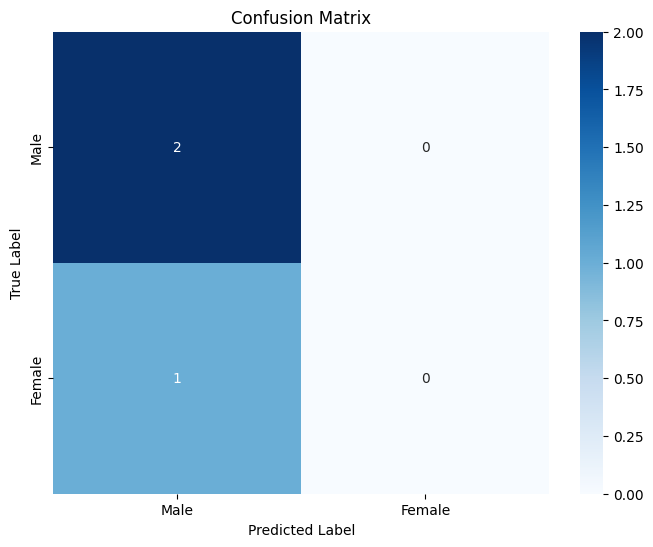

In [11]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()